In [1]:
# imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_diamonds= pd.read_csv("..\data\diamonds_train.csv")
df_diamonds.describe()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\paul_\AppData\Local\Temp\ipykernel_51076\3383073183.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_diamonds= pd.read_csv("..\data\diamonds_train.csv")


,price,carat,depth,table,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154
std,3992.416147,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2397.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000
max,18823.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000


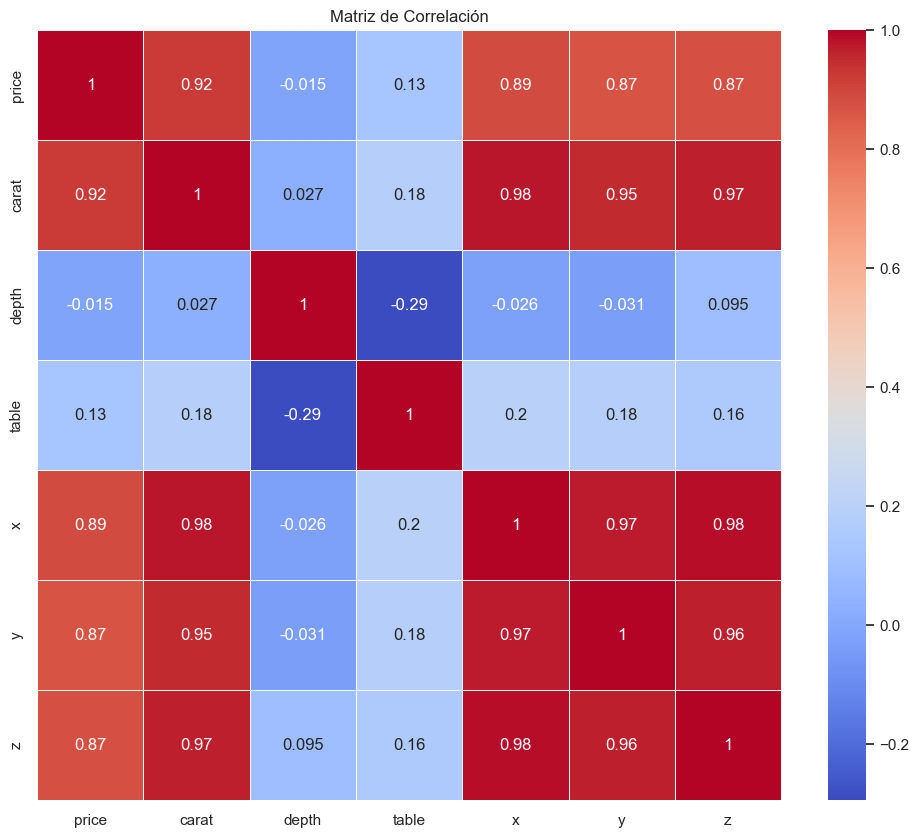

In [17]:
numeric_columns = df_diamonds.select_dtypes(include=[np.number])
# Crear la matriz de correlación
correlation_matrix =numeric_columns.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [33]:
diamonts_limp = df_diamonds.drop(columns=["x","y","z"])
diamonts_limp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   city     40455 non-null  object 
 3   depth    40455 non-null  float64
 4   table    40455 non-null  float64
 5   cut      40455 non-null  object 
 6   color    40455 non-null  object 
 7   clarity  40455 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 2.5+ MB


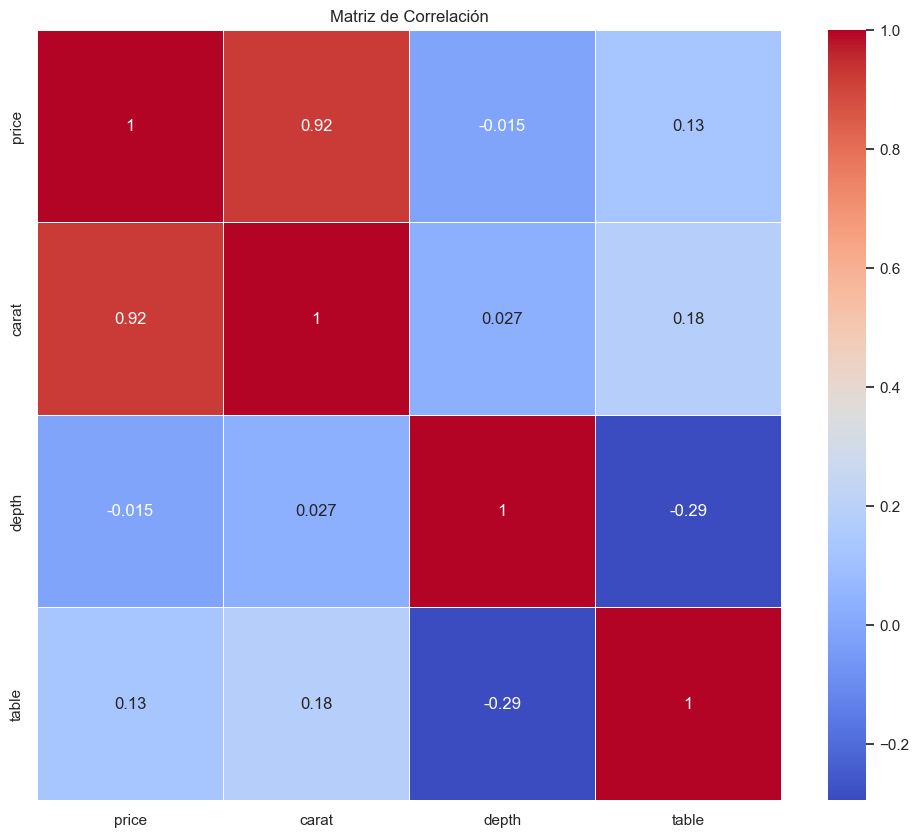

In [34]:
numeric_columns2 = diamonts_limp.select_dtypes(include=[np.number])
# Crear la matriz de correlación
correlation_matrix =numeric_columns2.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [35]:
diamons_encoded= pd.get_dummies(diamonts_limp, columns=["city","cut","color","clarity"], dtype=int)
diamons_encoded

,price,carat,depth,table,city_Amsterdam,city_Antwerp,city_Dubai,city_Kimberly,city_Las Vegas,city_London,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,4268,1.21,62.4,58.0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,505,0.32,63.0,57.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2686,0.71,65.5,55.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,738,0.41,63.8,56.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4882,1.02,60.5,59.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,10070,1.34,62.7,57.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
40451,12615,2.02,57.1,60.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
40452,5457,1.01,62.7,56.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
40453,456,0.33,61.9,54.3,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [68]:
# Create train and test (validation) samples
x= diamons_encoded.drop('price', axis=1)
y = diamons_encoded['price']

In [37]:
#dividimos los valores y probamos el 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (32364, 36), X_test: (8091, 36), y_train: (32364,), y_test: (8091,)


In [38]:
#RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators =500, random_state=42)#semilla
forest_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [39]:
lf_predic = forest_model.predict(X_test)

In [40]:
lineaf_mse = mean_squared_error(y_test, lf_predic)
print("lineal mode",lineaf_mse)

lineal mode 310708.9155715964


In [41]:
r2_lmse = r2_score(y_test, lf_predic)
r2_lmse

0.9809203062301884

In [42]:
from sklearn.metrics import root_mean_squared_error
lrmse= root_mean_squared_error(y_test, lf_predic)
print(f"Root Mean Squared Error: {lrmse}")

Root Mean Squared Error: 557.4126977129212


In [61]:
df_diamonds_test= pd.read_csv("..\data\diamonds_test.csv")
df_diamonds_test

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\paul_\AppData\Local\Temp\ipykernel_51076\1061025529.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_diamonds_test= pd.read_csv("..\data\diamonds_test.csv")


,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,Amsterdam
13481,13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,New York City
13482,13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,Tel Aviv
13483,13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45,Surat


In [62]:
diamons_df_test1= pd.get_dummies(df_diamonds_test, columns=["city","cut","color","clarity"], dtype=int)
diamons_df_test1

,id,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.79,62.7,60.0,5.82,5.89,3.67,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1.20,61.0,57.0,6.81,6.89,4.18,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2,1.57,62.2,61.0,7.38,7.32,4.57,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0.90,63.8,54.0,6.09,6.13,3.90,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,0.50,62.9,58.0,5.05,5.09,3.19,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,61.9,56.0,5.35,5.32,3.30,1,0,0,...,0,0,0,0,1,0,0,0,0,0
13481,13481,0.71,62.2,55.0,5.71,5.73,3.56,0,0,0,...,1,0,0,0,0,0,0,1,0,0
13482,13482,0.70,61.6,55.0,5.75,5.71,3.53,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13483,13483,0.70,58.8,57.0,5.85,5.89,3.45,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
x_test2 =diamons_df_test1.drop(columns=["x","y","z","id"])
x_test2

,carat,depth,table,city_Amsterdam,city_Antwerp,city_Dubai,city_Kimberly,city_Las Vegas,city_London,city_Luxembourg,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.79,62.7,60.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.20,61.0,57.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1.57,62.2,61.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.90,63.8,54.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.50,62.9,58.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0.57,61.9,56.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13481,0.71,62.2,55.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
13482,0.70,61.6,55.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13483,0.70,58.8,57.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [65]:
y_predic_test = forest_model.predict(x_test2)
y_predic_test

array([ 2947.108,  5349.71 , 10736.08 , ...,  3138.734,  2099.49 ,
         922.432])

In [66]:
column_names = ["price"]
check_df = pd.DataFrame(y_predic_test, columns=column_names, index=diamons_df_test1['id'])
check_df.reset_index(inplace=True)
check_df

,id,price
0,0,2947.108
1,1,5349.710
2,2,10736.080
3,3,3980.204
4,4,1561.578
...,...,...
13480,13480,1626.471
13481,13481,2418.860
13482,13482,3138.734
13483,13483,2099.490


In [67]:
check_df.to_csv('archivo3.csv', index=False)

In [ ]:
diamonts_limp = .drop(columns=["REMOTE_APP_BYTES","REMOTE_APP_PACKETS"])
diamonts_limp.info()

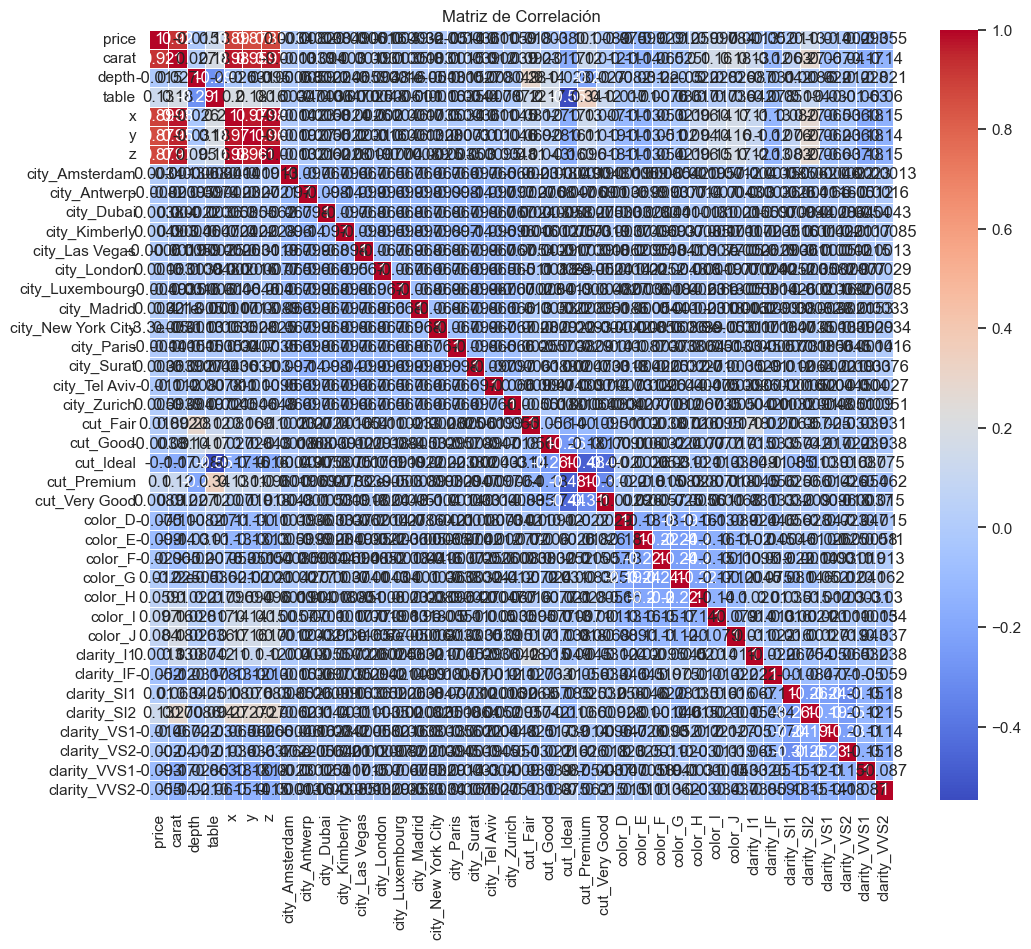

In [6]:
# Seleccionamos variables numericas nada mas 
numeric_columns = diamons_encoded.select_dtypes(include=[np.number])
# Crear la matriz de correlación
correlation_matrix =numeric_columns.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()